In [13]:
%load_ext autoreload
%autoreload 2
import sys
import platform
from pathlib import Path
from os import environ
if platform.system() == "Darwin": # Nat laptop
    sys.path.extend(['/Users/nkinsky/Documents/UM/GitHub/NeuroPy'])
    sys.path.extend(['/Users/nkinsky/Documents/UM/GitHub/Projects_sandbox'])
else:
    if environ["HOSTNAME"] == "lnx00004": # Nat Linux computer
        sys.path.extend(['/data/GitHub/NeuroPy'])
        sys.path.extend(['/data/GitHub/Projects_sandbox'])
    
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import scipy.signal as sg
import matplotlib.pyplot as plt
from neuropy.utils.mathutil import min_max_scaler
from scipy.ndimage import gaussian_filter1d, gaussian_filter
from copy import deepcopy
from tqdm import tqdm

from neuropy import plotting
from neuropy.analyses.placefields import Pf1D, Pf1Dsplit
from neuropy.analyses.oscillations import detect_theta_epochs
from neuropy.core.position import Position
from neuropy.core.epoch import Epoch
from neuropy.core.session import ProcessData
from neuropy.plotting.ratemaps import plot_ratemap
from neuropy.plotting.figure import Fig
from neuropy.utils.misc import flatten
from neuropy.io import BinarysignalIO
from neuropy.plotting.signals import plot_signal_w_epochs

from Psilocybin.subjects import get_psi_dir, get_pyr_ch

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
animals = ["Finn", "Rey", "Rose", "Finn2"]
sessions = ["Saline1", "Psilocybin", "Saline2"]

## Loop through, plot artifacts and save to CSV for each session

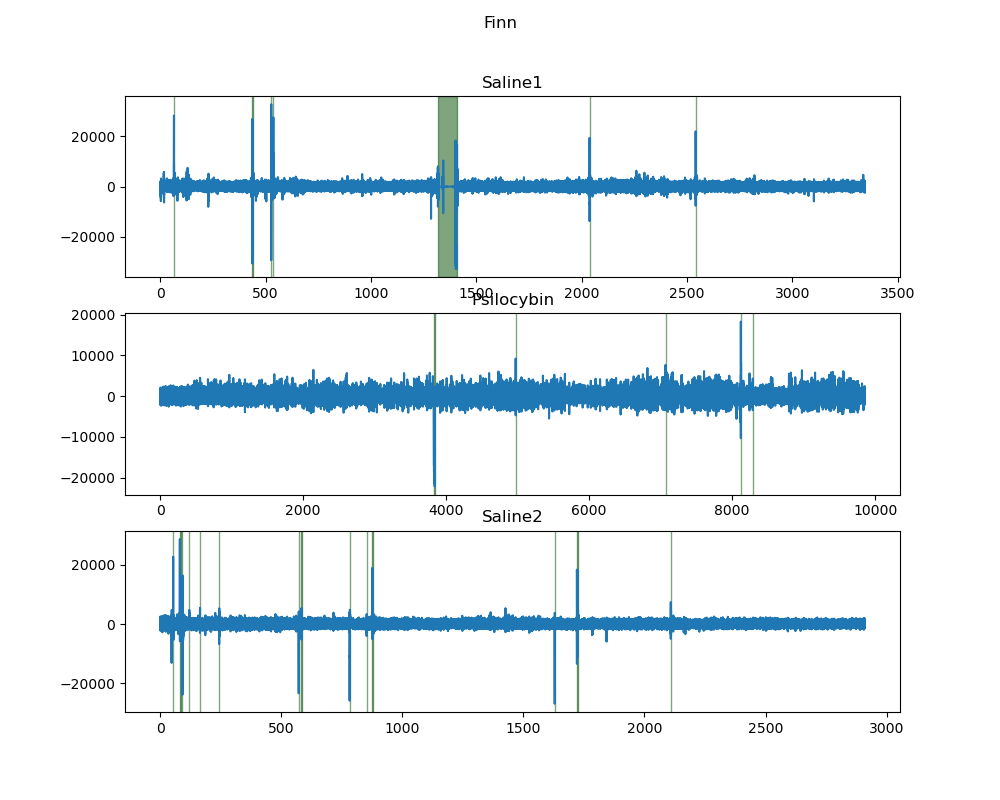

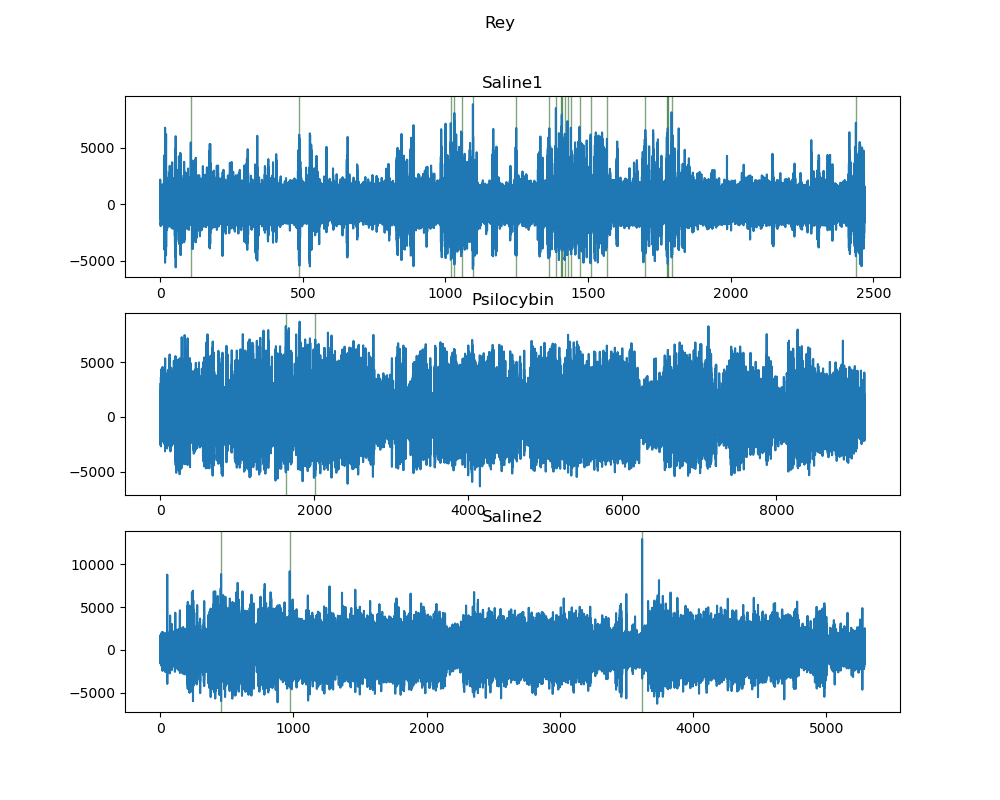

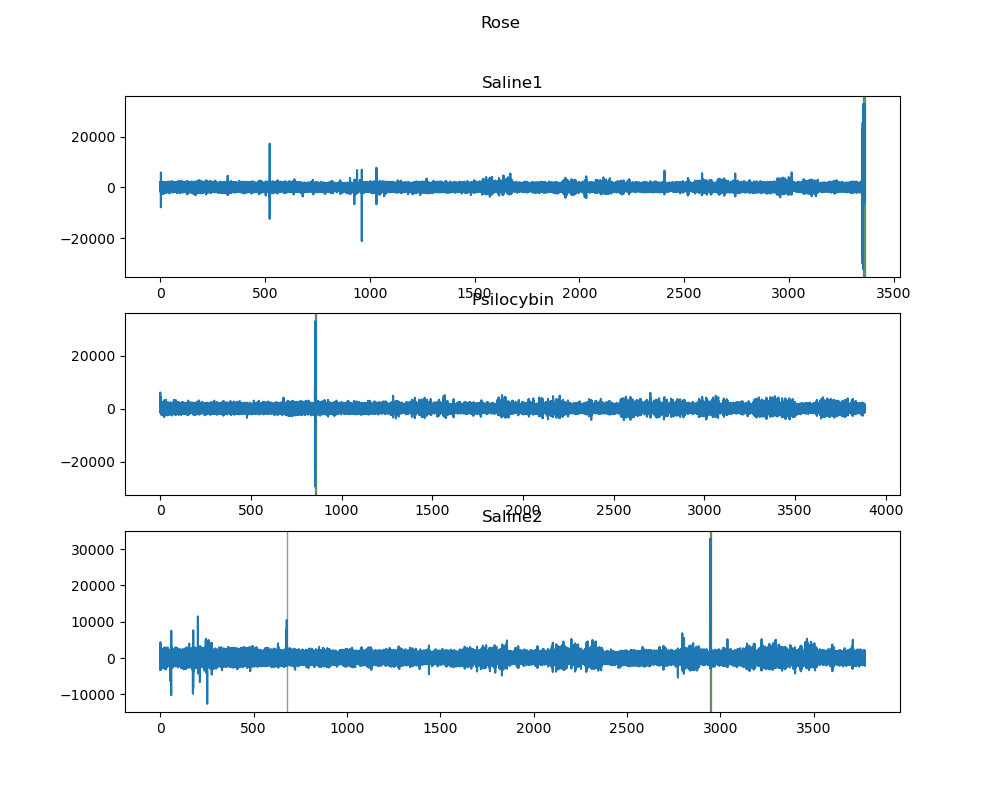

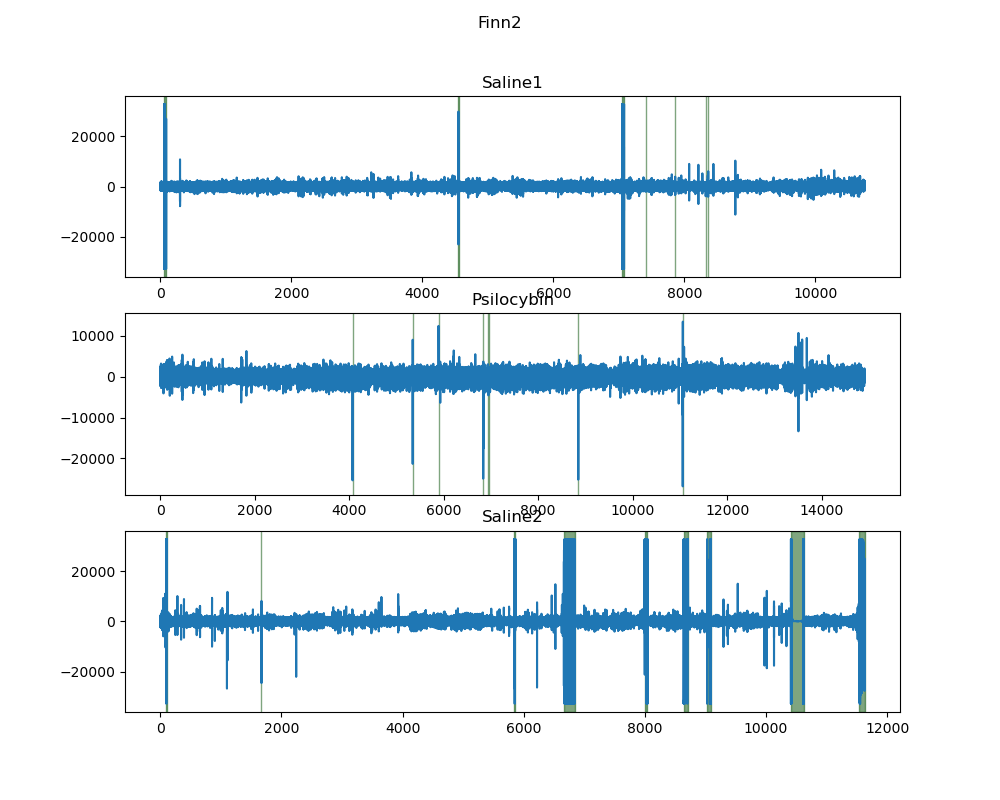

In [15]:
%matplotlib widget

for animal in animals:

    fig, ax = plt.subplots(3, 1, figsize=(10, 8))
    fig.suptitle(animal)
    
    for ids, session in enumerate(sessions):
    
        dir_use = get_psi_dir(animal, session)
        sess = ProcessData(dir_use)
        pyr_ch = get_pyr_ch(animal, session)
        
        signal = sess.eegfile.get_signal()
        art_epochs = Epoch(epochs=None, file=sess.filePrefix.with_suffix(".artifact.npy"))
        
        plot_signal_w_epochs(signal, channel=pyr_ch, epochs=art_epochs, ax=ax[ids])
        ax[ids].set_title(session)
        
        art_epochs.to_dataframe().to_csv(sess.filePrefix.with_suffix(".artifact.csv"))


## Sanity check - plot both with original artifact and new file from CSV

Mismatch in Finn Psilocybin
[9.09494702e-13 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


/tmp/ipykernel_47591/1438758441.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(3, 2, figsize=(10, 8))


Mismatch in Finn2 Psilocybin
[-4.54747351e-13  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  9.09494702e-13  0.00000000e+00  0.00000000e+00]


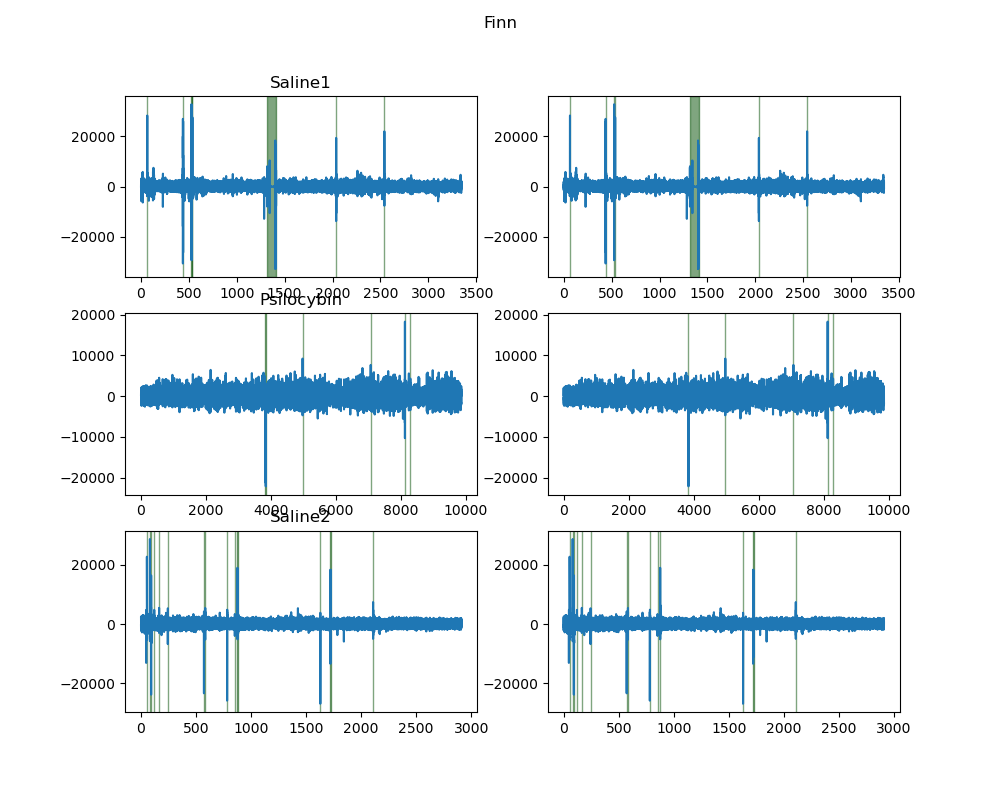

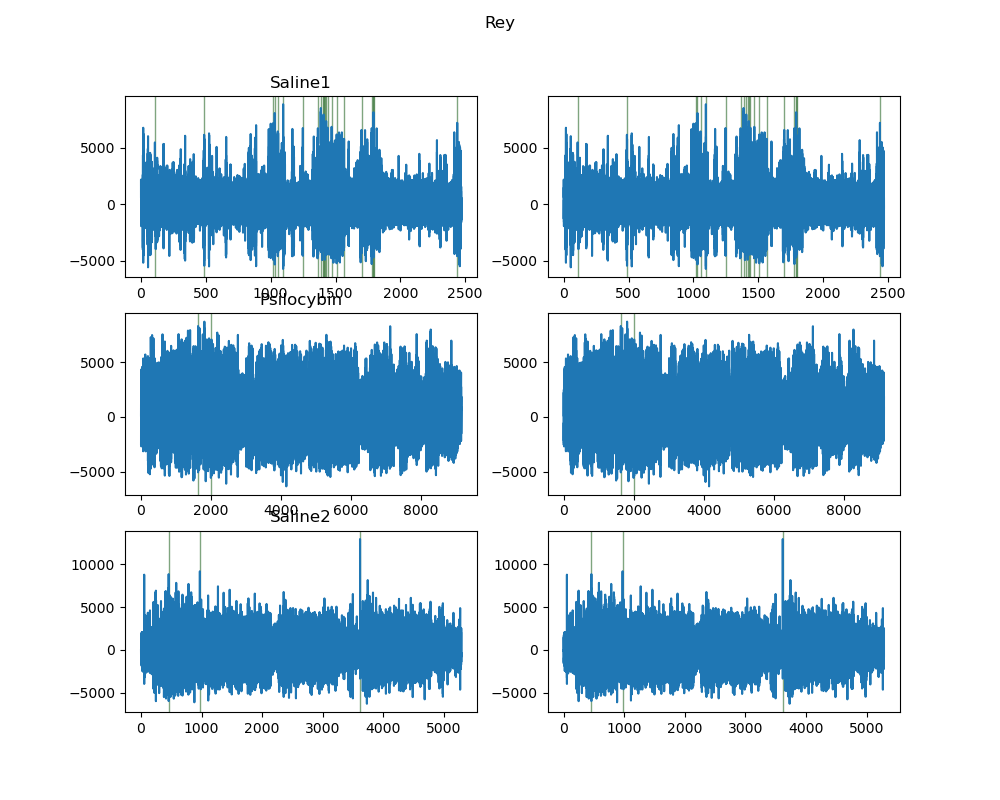

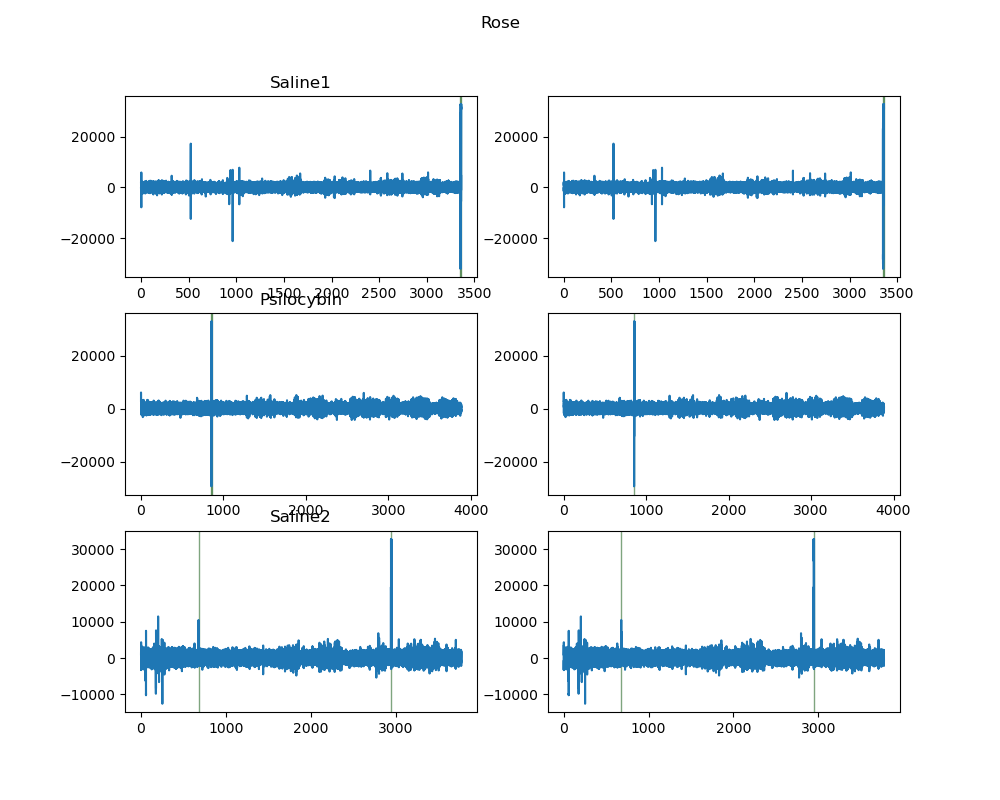

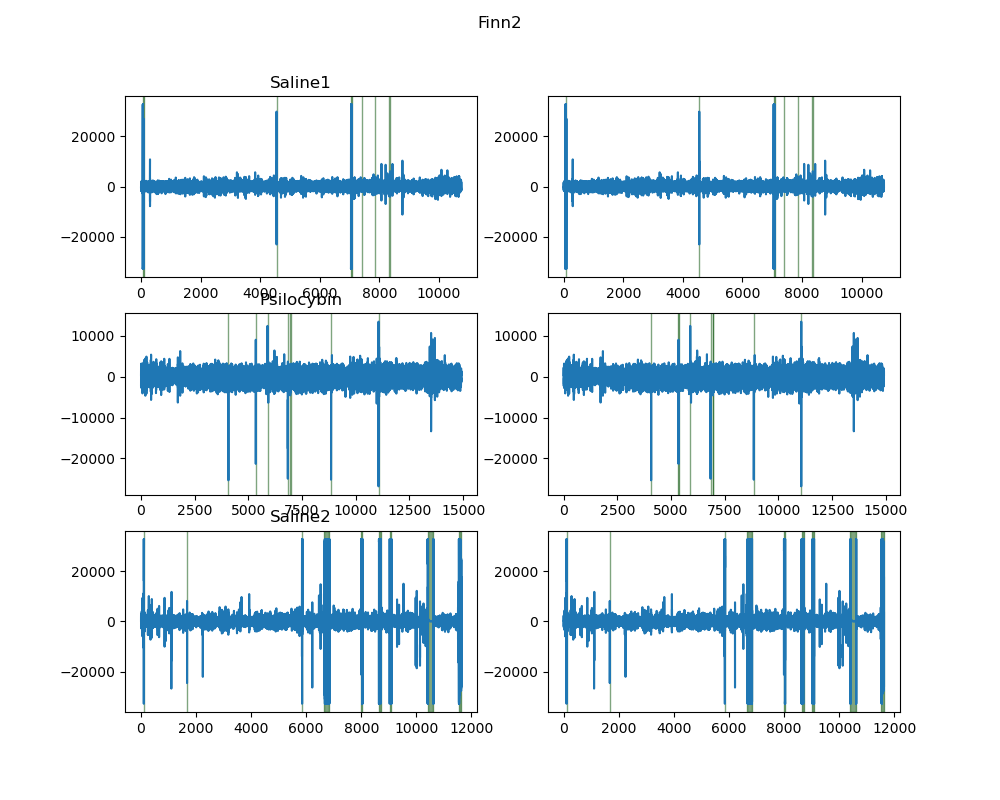

In [21]:
%matplotlib widget

for animal in animals:

    fig, ax = plt.subplots(3, 2, figsize=(10, 8))
    fig.suptitle(animal)
    
    for ids, session in enumerate(sessions):
    
        dir_use = get_psi_dir(animal, session)
        sess = ProcessData(dir_use)
        pyr_ch = get_pyr_ch(animal, session)
        
        signal = sess.eegfile.get_signal()
        art_epochs = Epoch(epochs=None, file=sess.filePrefix.with_suffix(".artifact.npy"))
        
        plot_signal_w_epochs(signal, channel=pyr_ch, epochs=art_epochs, ax=ax[ids, 0])
        ax[ids, 0].set_title(session)

        # From csv
        art_epochs_check = pd.read_csv(sess.filePrefix.with_suffix(".artifact.csv"), index_col=0)
        art_epochs_check = Epoch(epochs=art_epochs_check)
        
        plot_signal_w_epochs(signal, channel=pyr_ch, epochs=art_epochs_check, ax=ax[ids, 1])

        if not np.all((art_epochs.durations - art_epochs_check.durations) == 0):
            print(f"Mismatch in {animal} {session}")
            print(art_epochs.durations - art_epochs_check.durations)
        
